<a href="https://colab.research.google.com/github/Aestivation/DL2025-Labs/blob/main/Recuurent_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)


In [2]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis]

n_steps = 50
series = generate_time_series(10000, n_steps + 1)

X_train, y_train = series[:7000, :n_steps], series[:7000, 1:n_steps+1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, 1:n_steps+1]
X_test,  y_test  = series[9000:, :n_steps], series[9000:, 1:n_steps+1]


In [3]:
def compile_and_train(model, name):
    model.compile(loss="mse", optimizer="adam")
    print(name)
    model.summary()
    history = model.fit(
        X_train, y_train,
        epochs=5,
        validation_data=(X_valid, y_valid)
    )
    return history


In [4]:
simple_rnn = keras.Sequential([
    layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    layers.TimeDistributed(layers.Dense(1))
])

hist_simple = compile_and_train(simple_rnn, "Simple RNN")


Simple RNN


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, None, 20)       │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, None, 1)        │            21 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461 (1.80 KB)

 Trainable params: 461 (1.80 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0644 - val_loss: 0.0132
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0111 - val_loss: 0.0073
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0067 - val_loss: 0.0056
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0055 - val_loss: 0.0052
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0052 - val_loss: 0.0051


In [5]:
deep_rnn_bn = keras.Sequential([
    layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    layers.BatchNormalization(),
    layers.SimpleRNN(20, return_sequences=True),
    layers.TimeDistributed(layers.Dense(1))
])

hist_bn = compile_and_train(deep_rnn_bn, "Deep RNN + BatchNorm")


Deep RNN + BatchNorm


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, None, 20)       │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, None, 20)       │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, None, 20)       │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, None, 1)        │            21 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,361 (5.32 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 40 (160.00 B)

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - loss: 0.0625 - val_loss: 0.0215
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0067 - val_loss: 0.0085
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0046 - val_loss: 0.0045


In [9]:
deep_rnn_ln = keras.Sequential([
    layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    layers.LayerNormalization(),
    layers.SimpleRNN(20, return_sequences=True),
    layers.TimeDistributed(layers.Dense(1))
])

hist_ln = compile_and_train(deep_rnn_ln, "Deep RNN + LayerNorm")


Deep RNN + LayerNorm


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, None, 20)       │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization             │ (None, None, 20)       │            40 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, None, 20)       │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, None, 1)        │            21 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,321 (5.16 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: 0.1551 - val_loss: 0.0122
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0111 - val_loss: 0.0084
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0082 - val_loss: 0.0071
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0070 - val_loss: 0.0063
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0063 - val_loss: 0.0059


In [10]:
lstm = keras.Sequential([
    layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    layers.TimeDistributed(layers.Dense(1))
])

hist_lstm = compile_and_train(lstm, "LSTM")


LSTM


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, None, 20)       │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, None, 1)        │            21 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,781 (6.96 KB)

 Trainable params: 1,781 (6.96 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0602 - val_loss: 0.0116
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0097 - val_loss: 0.0071
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0067 - val_loss: 0.0062
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0061 - val_loss: 0.0058
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0056 - val_loss: 0.0054


In [12]:
gru = keras.Sequential([
    layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    layers.TimeDistributed(layers.Dense(1))
])

hist_gru = compile_and_train(gru, "GRU")


GRU


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, None, 20)       │         1,380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, None, 1)        │            21 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,401 (5.47 KB)

 Trainable params: 1,401 (5.47 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - loss: 0.1081 - val_loss: 0.0121
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0100 - val_loss: 0.0071
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.0066 - val_loss: 0.0059
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0057 - val_loss: 0.0053
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - loss: 0.0052 - val_loss: 0.0050


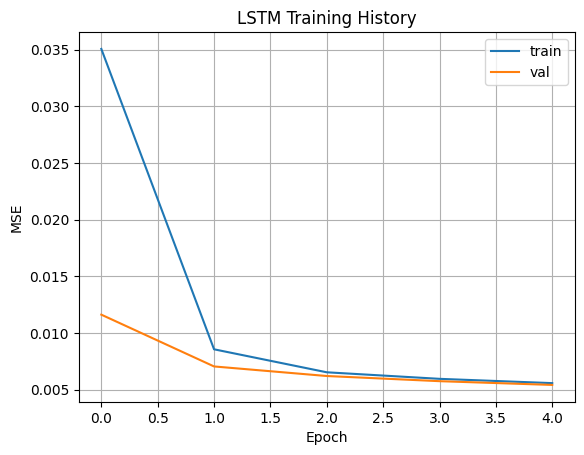

In [14]:
def plot_history(history, title):
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="val")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid()
    plt.show()

plot_history(hist_lstm, "LSTM Training History")
